# TRAVAIL TP1

## 0) Étude d'une fonction enveloppe

De forme $f(t) = t^\alpha e^{-\theta t}$

Première est :
$$f(t) = t^2 e^{-t}$$

Seconde est :
$$f(t) = t^3 e^{-t}$$

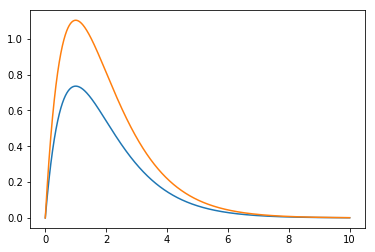

In [21]:
import matplotlib.pyplot as plt
import numpy as np

fs = 1000
ts = 1 / fs
t = np.arange(0, 10, ts)

plt.figure(1)
plt.plot(t, t * 2 * np.exp(-t)) # La premiere
plt.plot(t, t * 3 * np.exp(-t)) # La seconde

On abstracte ce fonctionnement dans une fonction

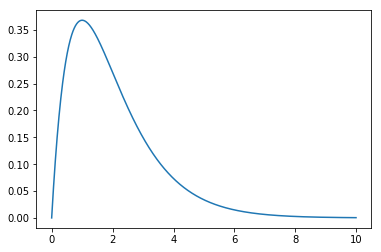

In [22]:
def enveloppe(t , alpha, sigma): 
    """
        <t> est un vecteur de temps
        <alpha> : position du maximum
        <sigma> : atténuation
    """
    # Operateur ** est la puissance
    out = (t ** alpha) * (np.exp(-sigma * t))
    return out

# Creation d'un vecteur de temps
t = np.arange(0, 10, 0.01)

plt.plot(t, enveloppe(t, 1, 1)) # La premiere


## 1) Enregistrement de signal en .wav


In [23]:
from scipy.io import wavfile as wav

rate, data = wav.read('la_piano.wav')
wav.write("toto.wav", 44100, data)

## 2) Création de signal à partir de fichier source

À partir de l'enregistrement ```la_piano.wav``` créez le signal $y(t)=x(t)+a_1x(t-\tau_1)+a_2x(t-\tau_2)$ où vous choisirez vous-même les constantes $a_1,a_2,\tau_1,\tau_2$.

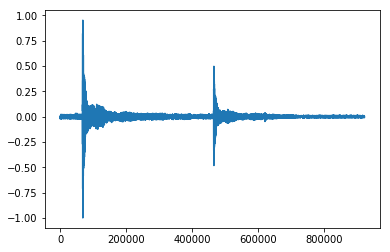

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav

def normaliser_son_mono(x):
    M = np.max(abs(x)); # la plus grande valeur absolue du signal
    return  x/M;   # conversion automatique au format réel et normalisation 

rate, data = wav.read('la_piano.wav') # Data est en stereo, mais le channel de droit est du bruit
Fs = 10000; # la fréquence d'échantillonnage (rate en anglais)
Ts = 1 / Fs; # le pas d'échantillonnage
t = np.arange(0, 10, Ts)

x = normaliser_son_mono(data[:,0])
N = np.size(x)

a1 = 1 # Attenuatinos
a2 = 1
tau1 = 9 # Decalage en secondes
tau2 = 0

n0 = int(tau1 * rate) # le retard en nombre d'échantillons : int renvoie bien un entier 
xEcho1 = np.zeros(N) # Initialise un tableau de taille N a 0
xEcho1[n0:(N-1)] = x[0:(N - n0-1)]

n0 = int(tau2 * rate) # le retard en nombre d'échantillons : int renvoie bien un entier 
xEcho2 = np.zeros(N) # Initialise un tableau de taille N a 0
xEcho2[n0:(N-1)] = x[0:(N - n0-1)]

y = x + a1 * xEcho1 + a2 * xEcho2
y = normaliser_son_mono(y)

plt.plot(y)


## 3) Analyse de signal

Soit  le signal $$p_{f_0,K}(t)=\left( \cos(2\pi f_0 t )\right) ^{2K+1}$$ où $K$ est un entier naturel et $f_0$ une fréquence.  
        Superposez les graphes de $p_{1,K}(t)$ sur l'intervalle $[-1.5 \ , \ 1.5]$ et pour les valeurs 
       $K \in \{1 , 4 , 20 \}$ : vous choisirez 3 couleurs. 
        Vous ajouterez une légende. 
        Quelle est l'allure du graphe quand $K$ est très grand? Expliquez.

(0, 0.01)

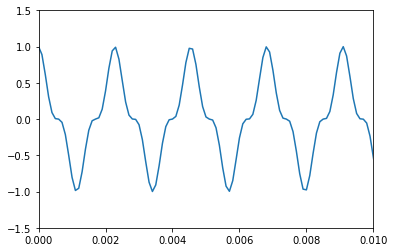

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav

Fs = 10000; # la fréquence d'échantillonnage (rate en anglais)
Ts = 1 / Fs; # le pas d'échantillonnage
t = np.arange(0, 5, Ts) # Tableau de 0 a 5 par un pas de Ts

f0 = 440
K = 1

y = (np.cos(2 * np.pi * f0 * t)) ** (2 * K + 1)

plt.plot(t, y)
plt.ylim(-1.5, 1.5)
plt.xlim(0, 0.01)

Abstraction du code précédent dans une fonction réutilisable

In [59]:
def pf0kt(f0, K, t):
    return (np.cos(2 * np.pi * f0 * t)) ** (2 * K + 1)
    

## 4) Son de synthèse

Soit le son suivant de synthèse suivant : $$y(t)=t^{\alpha}e^{-\sigma t} p_{f_0,K}(t) $$ défini pour tous les $t\geq 0$. Vous choisirez d'abord le choix des paramètres suivant : 
      $\alpha= 1$,       $\sigma = 1$,      $f_0=440$Hz et       $K=2$. 
 Créez ce signal : durée $5$ secondes, fréquence d'échantillonnage $F_s=44100$Hz. Visualisez-le. 

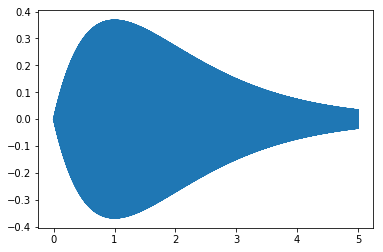

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav

Fs = 44100; # la fréquence d'échantillonnage
Ts = 1 / Fs; # le pas d'échantillonnage
t = np.arange(0, 5, Ts)

sigma = 1
alpha = 1
f0 = 440
K = 2

y = t ** alpha * np.exp(-sigma * t) * pf0kt(f0, K, t)

plt.plot(t, y)

## 5) Encoder son de synthèse en .wav

In [65]:
scaled = np.round(32767 * y) # passage en 16 bits
newdata = scaled.astype(np.int16) # conversion en type int
wav.write("ex5.wav", 44100, y)

## 6) Questions / Réponses

Reprenez les deux questions précédentes mais cette fois en choisissant un autre jeu de paramètres (gardez $f_0=440$Hz) qui conduise à un son qui vous semble intéressant. Vous répondrez aux questions :
    * quelle est l'influence de $\sigma$?
    * quelle est l'influence de $\alpha$?
    * percevez-vous des différences de timbre (à $\sigma$ et $\alpha$ fixés) lorsque $K$ croît?

# 7) Son de hauteur constante 

Enregistrez un son de hauteur constante (une note tenue, donc) pendant avec un instrument que vous pratiquez (si vous ne pratiquez pas d'instrument, chantez!) et, comme indiqué en cours, représentez son graphe, un zoom sur une zone de durée $0.1$s et une zone de durée $0.01$s. Reprenez les fonctions que j'ai crées et que vous trouverez dans le notebook *notes de cours sur les séries de Fourier*.

# 8) (Optionnel)